<a href="https://colab.research.google.com/github/eliasalemann/UNI/blob/main/UNI_TRABAJO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJETIVO**:

Identificar el tipo de reposteria (tipo 1 o tipo 0) basado en la cantidad de los ingredientes dados (clasificacion). Se utilizara la libreria 'Pycaret'


**RESULTADOS:**
1.   El modelo actual permite identificar el tipo de reposteria con una precision del 99%, basado en una muestra de 80 observaciones de entrenamiento y 20 muestras de prueba
2.   Los ingredientes mas importantes para identificar las reposterias de tipo 1 son la harina (menores cantidades, mayor probabilidad), azucar y huevos (mayores cantidades, mayor probabilidad) 

A. Procesamiento de datos

La base de datos contiene 100 recetas de dos tipos de reposteria. Tenemos la informacion de cada ingrediente en cada receta. Por ejemplo leche (Milk), Mantequilla (Butter), etc. Primero se crearan las variables y luego se pondran en el formato de dataframe para su procesado

In [1]:
#Instalando Pycaret
#!pip install pycaret

#Importando Pandas
import pandas as pd
 
#Creando las variables
Type = [1,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1]
Flour = [34,53,39,42,34,40,39,52,50,42,40,55,38,42,39,55,47,45,51,54,51,48,36,55,41,38,38,49,43,47,47,34,46,36,35,49,51,55,46,41,49,41,59,39,57,40,36,36,51,47,34,39,38,37,41,39,54,47,51,39,47,33,50,53,50,51,37,50,50,35,35,50,40,57,49,42,39,50,46,47,48,40,42,51,36,50,56,58,53,35,40,47,40,38,34,38,37,49,38,38]
Milk = [17,24,17,18,20,6,8,14,24,27,25,28,7,21,13,18,21,11,22,27,17,27,14,25,14,17,15,27,25,24,29,23,28,18,20,12,28,27,25,14,17,7,20,13,22,10,12,16,14,26,17,12,15,12,19,30,19,23,11,0,24,10,26,26,17,16,19,25,16,12,7,17,24,16,20,11,16,17,13,37,31,24,8,17,9,13,29,28,26,19,16,21,11,19,15,13,17,27,15,12]
Sugar = [20,11,24,25,20,24,28,17,18,24,15,3,22,16,17,17,10,17,19,7,4,8,21,17,26,22,31,11,14,12,6,23,20,27,36,24,12,3,19,14,12,21,12,26,22,20,19,24,0,10,23,17,23,20,31,22,9,18,12,26,11,25,10,12,13,5,25,12,21,19,29,17,24,15,3,25,25,17,23,14,5,22,25,12,19,11,22,19,2,24,23,22,30,25,20,16,21,0,22,16]
Butter = [20,9,19,9,20,11,17,5,11,19,19,7,13,10,19,4,9,17,5,5,9,8,14,10,18,11,8,7,7,6,7,18,8,9,12,16,6,7,10,9,10,12,8,19,7,18,16,12,12,10,11,19,15,13,9,22,8,6,9,19,8,21,3,12,1,2,16,6,10,8,7,11,9,14,4,16,20,8,8,9,11,13,27,3,15,11,8,8,11,18,18,10,11,13,19,14,10,5,9,13]
Egg = [5,5,7,5,11,7,3,7,7,11,13,5,9,8,10,6,8,8,3,5,5,5,11,4,5,6,6,7,5,9,2,9,4,11,8,6,1,5,3,2,7,7,7,6,6,7,11,9,6,4,13,6,8,13,13,8,4,4,5,14,6,10,5,6,6,6,7,5,3,5,5,4,0,8,0,9,11,6,15,6,5,7,9,2,6,7,3,10,6,7,9,7,16,12,10,7,6,4,7,12]
Baking_Powder = [2,2,2,1,0,3,2,2,1,1,0,2,2,3,1,2,1,1,2,2,2,1,2,1,0,2,1,1,1,1,1,1,2,1,2,1,1,2,2,2,2,0,2,0,1,2,1,1,2,1,0,2,0,0,1,1,2,1,2,1,1,1,1,2,2,2,2,2,1,1,1,1,1,2,2,2,0,1,1,1,2,2,2,1,1,1,1,2,2,1,0,1,2,1,1,1,1,0,2,2]
Vanilla = [1,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,0,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,2,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,2,1,0,1,1,0,1,1,0,1,1]

#Armando el dataframe final
df = pd.DataFrame({"Type":Type,"Flour":Flour,"Milk":Milk,"Sugar":Sugar,"Butter":Butter,"Egg":Egg,"Baking_Powder":Baking_Powder,"Vanilla":Vanilla})

B. Analisis exploratorio




1.   La base de datos contiene 100 recetas de dos distintos tipos de reposteria (Tipo 0 y tipo 1)
2.   Los rangos de las variables parecen correctos



In [2]:
#Distribucion de los tipos de reposteria
df.groupby('Type').count()

,Flour,Milk,Sugar,Butter,Egg,Baking_Powder,Vanilla
Type,,,,,,,
0,50,50,50,50,50,50,50
1,50,50,50,50,50,50,50


In [15]:
#Rango de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,100.0,0.50,0.502519,0.0,0.00,0.5,1.00,1.0
Flour,100.0,44.30,6.982663,33.0,38.00,42.5,50.00,59.0
Milk,100.0,18.51,6.780088,0.0,13.75,17.0,24.00,37.0
Sugar,100.0,17.72,7.488820,0.0,12.00,19.0,23.00,36.0
Butter,100.0,11.43,5.152728,1.0,8.00,10.0,15.25,27.0
Egg,100.0,6.90,3.157483,0.0,5.00,6.0,9.00,16.0
Baking_Powder,100.0,1.34,0.699495,0.0,1.00,1.0,2.00,3.0
Vanilla,100.0,0.56,0.537860,0.0,0.00,1.0,1.00,2.0




3.   No hay valores nulos, ni duplicados y el tipo de datos es aceptable (todas las variables son numericas)




In [16]:
#Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Type           100 non-null    int64
 1   Flour          100 non-null    int64
 2   Milk           100 non-null    int64
 3   Sugar          100 non-null    int64
 4   Butter         100 non-null    int64
 5   Egg            100 non-null    int64
 6   Baking_Powder  100 non-null    int64
 7   Vanilla        100 non-null    int64
dtypes: int64(8)
memory usage: 6.4 KB


In [17]:
#Valores nulos
df.isnull().sum()

Type             0
Flour            0
Milk             0
Sugar            0
Butter           0
Egg              0
Baking_Powder    0
Vanilla          0
dtype: int64

In [18]:
#Valores duplicados
df.duplicated().sum()

0

4.   Basado en el analis numerico y grafico de correlaciones y los graficos exploratorios: 
*   El tipo de reposteria 1 contiene mayores cantidades de azucar (Sugar), 'Mantequilla' (Butter) y Huevos (Egg) que el tipo 0 (correlaciones varian de moderadas a muy altas)
*   El tipo de reposteria 1 continene menores cantidades de harina (Flour) y leche (Milk) que el tipo 0 (correlaciones varian de moderadas a muy altas)
*   Las distribuciones de las variables son aceptables para el modelo de clasificacion que se utilizara en el siguiente paso






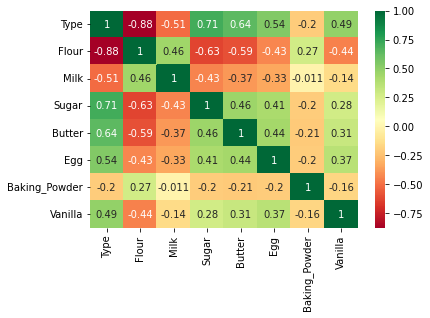

In [19]:
#Analisis correlacional numerico
import seaborn as sb
sb.heatmap(df.corr(), annot=df.corr(), cmap = 'RdYlGn')

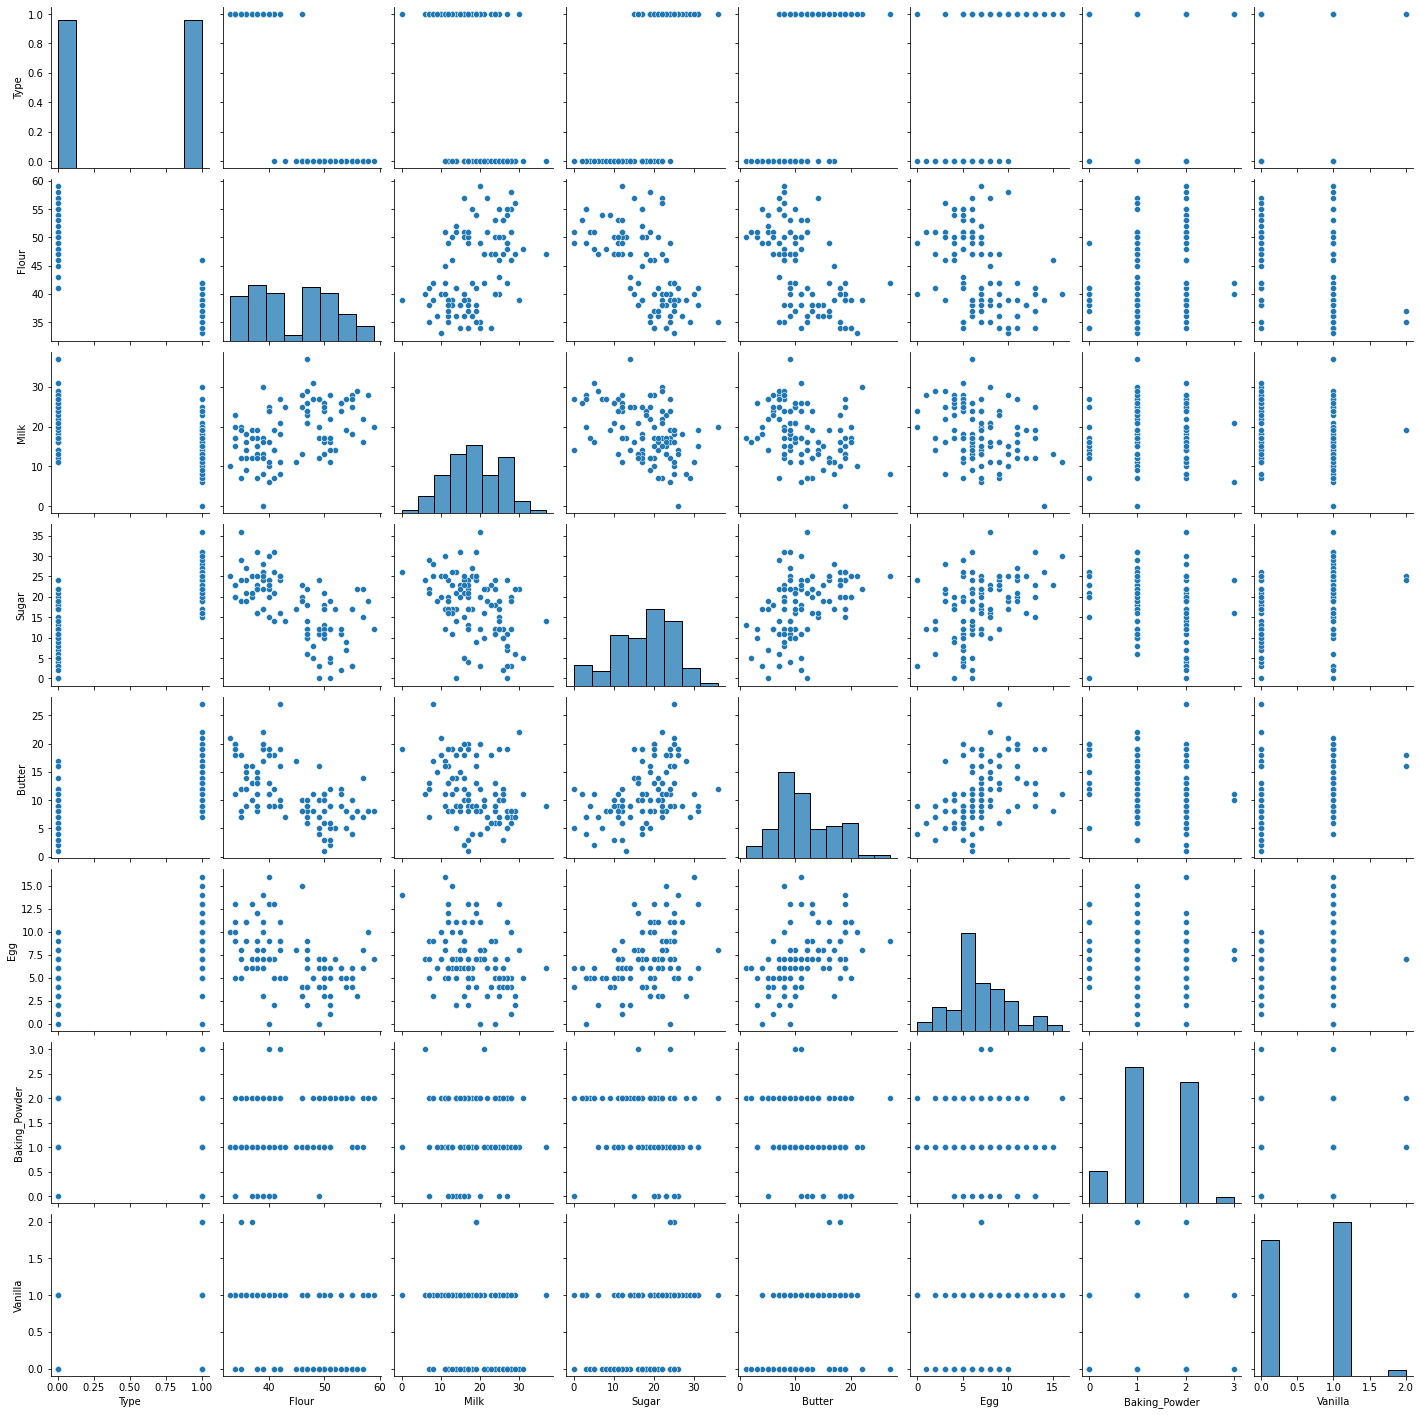

In [20]:
#Analisis correlacional grafico
sb.pairplot(df)

In [23]:
#Instalando pandas-profiling
#!pip install pandas-profiling

#Analisis exploratorio
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C. Modelado de datos


In [5]:
#Importando la libreria de clasificacion
from pycaret.classification import *

#Definicion del modelo
set_up = setup(df,
      target = 'Type',
      ignore_features = [],  #Se elimina por la falta de varianza
      numeric_features = ['Egg'],  #Se modelara como una variable continua
      categorical_features = [],
      train_size = .8,             #Se usara el 80% de los datos para escojer el mejor algoritmo
      normalize = True,            #Se normalizaran los valores porque las escalas difieren en cada variable
      silent = True)

#Escogiendo el mejor algoritmo y ajustando los hiper-parametros
mejor = compare_models(fold = 5)

modelo_final_noajustado = create_model(mejor, fold = 5)

modelo_final_ajustado = tune_model(modelo_final_noajustado, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0,1.0,1.0000,1.0000,1.000,1.0000
1,1.0000,1.0,1.0,1.0000,1.0000,1.000,1.0000
2,1.0000,1.0,1.0,1.0000,1.0000,1.000,1.0000
3,1.0000,1.0,1.0,1.0000,1.0000,1.000,1.0000
4,0.9375,1.0,1.0,0.8889,0.9412,0.875,0.8819
Mean,0.9875,1.0,1.0,0.9778,0.9882,0.975,0.9764
SD,0.0250,0.0,0.0,0.0444,0.0235,0.050,0.0472


El mejor modelo es

In [6]:
modelo_final_ajustado

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=60, n_jobs=-1, oob_score=False,
                       random_state=8719, verbose=0, warm_start=False)

D. Resultados




1.   El modelo fue entrenado para identificar el tipo de reposteria basado en 80 recetas (80% de los datos) y logro identificar el tipo correcto de 18 recetas, clasificando incorrectamente 2 recetas, una precision de 99%. Una precision muy alta. El desempeno podria cambiar con nuevas observaciones



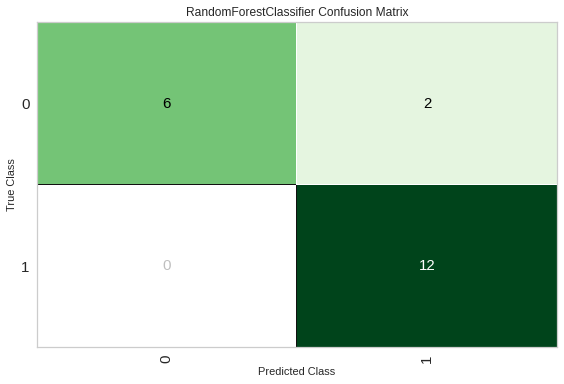

In [8]:
#Evaluacion del modelo
plot_model(modelo_final_ajustado, plot = 'confusion_matrix')

#Guardando el modelo final para futuras clasificaciones
modelo_final = finalize_model(modelo_final_ajustado)

2.   Los tres ingredientes mas importantes que parecen determinar el tipo 1 de reposteria son

*   Harina (Flour)
*   Azucar  (Sugar)
*   Huevos (Egg)


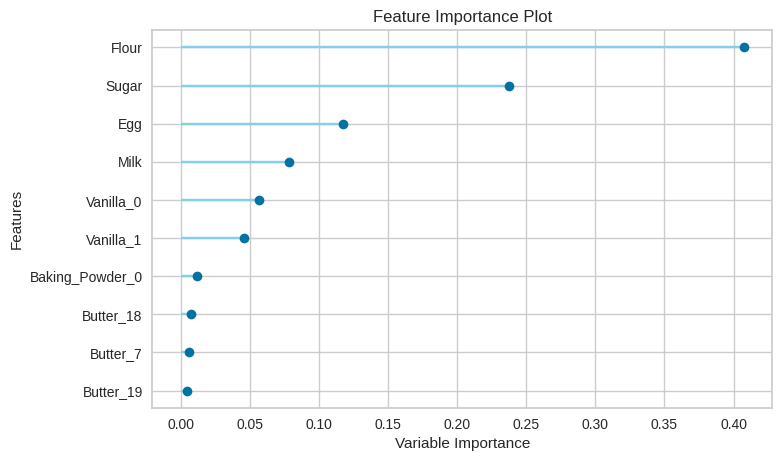

In [9]:
plot_model(modelo_final, plot = 'feature')



3.   Las reposterias de tipo 1 parecen caracterizarse por su mayor contenido de huevos (Egg) y azucar (Sugar) y por menor contenido de harina (Flour), que las reposterias de tipo 0

